In [1]:
from sklearn import model_selection, linear_model, metrics, datasets

import numpy as np
import pandas as pd
import unittest
import sys
import matplotlib.pylab as plt

#### Загрузка данных

In [2]:
raw_data = pd.read_csv('Data_tests.csv', header = 0, sep=',')
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
raw_data.datetime = pd.to_datetime(raw_data['datetime'])

In [4]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
print('NULL status:', raw_data.isnull().values.any())
raw_data.info()

NULL status: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### Добавление признака месяца и времени

In [6]:
raw_data['month'] = raw_data.datetime.apply(lambda x: x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x: x.hour)

#### Обчуение и тест

In [7]:
train_data = raw_data.iloc[:-1000, :]
test_data = raw_data.iloc[-1000:, :]

In [8]:
class MyExc(Exception):
    def __init__(self, string):
        print('У нас возникла проблема с :')
        print(string)
        a = input('Введите F чтобы продолжить выполнение')
        if a == 'F':
            pass
        else:
            sys.exit()

try:
    if list(train_data.shape)[0]+list(test_data.shape)[0] != list(raw_data.shape)[0]:
        raise MyExc("Размер суммы теста и обучения не совпадает с исходным размером выборки")
except MyExc:
    pass



In [9]:
print('Train Period')
print('train period form {} to {}'.format(train_data.datetime.min(), train_data.datetime.max()))
print('test period from {} to {}'.format(test_data.datetime.min(), test_data.datetime.max()))

Train Period
train period form 2011-01-01 00:00:00 to 2012-10-16 06:00:00
test period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая метка

In [10]:
train_labels = train_data['count'].values
train_information = train_data.drop(['count','datetime'], axis=1)

In [11]:
test_labels = test_data['count'].values
test_information = test_data.drop(['count', 'datetime'], axis=1)
### Уберем лишние признаки
train_information.drop(['casual', 'registered'], axis=1, inplace=True)
test_information.drop(['casual', 'registered'], axis=1, inplace=True)

Text(0.5, 1.0, 'Test Labels')

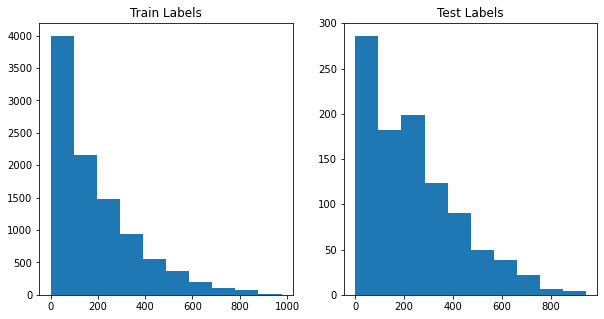

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(train_labels, bins=10)
plt.title('Train Labels')
plt.subplot(1,2,2)
plt.hist(test_labels)
plt.title('Test Labels')

#### Численные признаки

In [13]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour']

In [14]:
train_information = train_information[numeric_columns]
test_information = test_information[numeric_columns]

#### Модель + Масштабирование

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_information, train_labels)
scale_train_information = scaler.transform(train_information)
scale_test_information = scaler.transform(test_information)

In [16]:
classifier = linear_model.SGDRegressor(random_state=0)
classifier.fit(scale_train_information, train_labels)
print('ABSOLUTE ERROR:', metrics.mean_absolute_error(test_labels, classifier.predict(scale_test_information)))
print('Real test labels:')
print(test_labels[:10])
print('Predict')
print(classifier.predict(scale_test_information)[:10])
print('Coef:')
print(classifier.coef_)
classifier.get_params()

ABSOLUTE ERROR: 121.8835371361759
Real test labels:
[525 835 355 222 228 325 328 308 346 446]
Predict
[129.85077191 151.17889998 193.33762641 222.67603091 240.57638599
 251.01130419 256.87285157 282.21391554 287.38738113 297.60744105]
Coef:
[ 30.00743714  32.15063204 -42.27737422   3.77909816  12.70734945
  50.05870387]


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Использование pipeline для удобного масштабирования

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
pipeline = Pipeline(steps=[('scaling', scaler), ('regression', classifier)])
print(pipeline)
pipeline.fit(train_information, train_labels)
print('Error:', metrics.mean_absolute_error(test_labels, pipeline.predict(test_information)))

Pipeline(steps=[('scaling', StandardScaler()),
                ('regression', SGDRegressor(random_state=0))])
Error: 121.8835371361759


#### Перебор параметров по сетке

In [19]:
print(list(pipeline.get_params().keys()))
param_grid = {
    'regression__loss': ['squared_loss', 'huber'],
    'regression__n_iter_no_change': [3, 5,10,15, 30, 50],
    'regression__penalty': ['l1', 'l2', 'none'],
    'regression__alpha': [.0001, .01],
    'scaling__with_mean': [0,1],
}

['memory', 'steps', 'verbose', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__early_stopping', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter_no_change', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__validation_fraction', 'regression__verbose', 'regression__warm_start']


In [20]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)
grid_cv = model_selection.GridSearchCV(pipeline, param_grid, scoring=scorer, cv=4)
grid_cv.fit(train_information, train_labels)
print('1')

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/molozey/PycharmProjects/Course

1


In [21]:
print(grid_cv.best_params_)
grid_cv.best_score_

{'regression__alpha': 0.01, 'regression__loss': 'huber', 'regression__n_iter_no_change': 3, 'regression__penalty': 'l2', 'scaling__with_mean': 1}


138.71504228630877

#### Оценка по отложенному тесту

In [22]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_information))

171.54400164417987

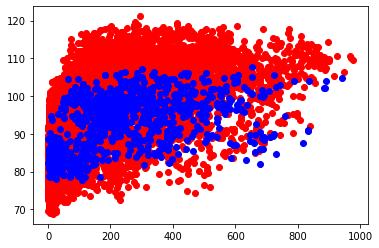

In [23]:
plt.scatter(train_labels, grid_cv.best_estimator_.predict(train_information), color='red')
plt.scatter(test_labels, grid_cv.best_estimator_.predict(test_information), color ='blue')